## Importing the required libraries

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

## Defining the Simulation Environment
#### 1) We can articulate the Simulation Environment if we assume that a specific advertisement has a fixed conversion rate through out the test and we know them. We can definitely assume them considering a business scenario.
#### 2) But, here we will directly import a simulation from a csv into a pandas dataframe as the test case for the concept demonstration.

In [33]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')

In [34]:
df.shape

(10000, 10)

In [35]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [36]:
N=df.shape[0]
d=df.shape[1]

## Success of Randomly selected ads (VS) Optimisation through Thompson Sampling 

In [67]:
ads_selected_random = []
ads_selected_thompson = []

number_of_selections_1 = [0]*d
number_of_selections_0 = [0]*d

total_rewards_random = 0
total_rewards_thompson = 0

reward_per_strategy = [0]*d

regret_curve_random = []
regret_curve_thompson = []

for n in range(0 , N):
    
    # Random_Strategy_Selection
    ad_random = random.randrange(d)
    ads_selected_random.append(ad_random)
    total_rewards_random += df.values[n , ad_random]
    
    # Optimisation through Thompson Sampling
    max_beta = 0
    ad_thompson = 0
    for i in range(0 , d):
        rand_beta = random.betavariate(number_of_selections_1[i]+1 , number_of_selections_0[i]+1)
        if(rand_beta > max_beta):
            max_beta = rand_beta
            ad_thompson = i         
    if(df.values[n , ad_thompson]==1):
        number_of_selections_1[ad_thompson] += 1
    else:
        number_of_selections_0[ad_thompson] += 1
    reward = df.values[n, ad_thompson]
    total_rewards_thompson += reward
    ads_selected_thompson.append(ad_thompson)
    
    # to store strategy wise rewards till nth round
    for i in range(0 , d):
        reward_per_strategy[i] += df.values[n , i]
    
    # to calculate the gap width between selected strategy and the best strategy till nth round
    regret_random = max(reward_per_strategy)-total_rewards_random
    regret_curve_random.append(regret_random)
    regret_thompson = max(reward_per_strategy)-total_rewards_thompson
    regret_curve_thompson.append(regret_thompson)

## Performance difference between Random_Selection and Thompson_Sampling

In [68]:
# assuming 400 rupees as premium for each customer conversion
amount_diff = (total_rewards_thompson - total_rewards_random)*400
amount_percentage_diff = (total_rewards_thompson - total_rewards_random)/total_rewards_random*100
print(f"Amount difference: Rs {amount_diff:0.00f}")
print(f"Amount percentage difference: {amount_percentage_diff:0.00f}%")

Amount difference: Rs 575200
Amount percentage difference: 122%


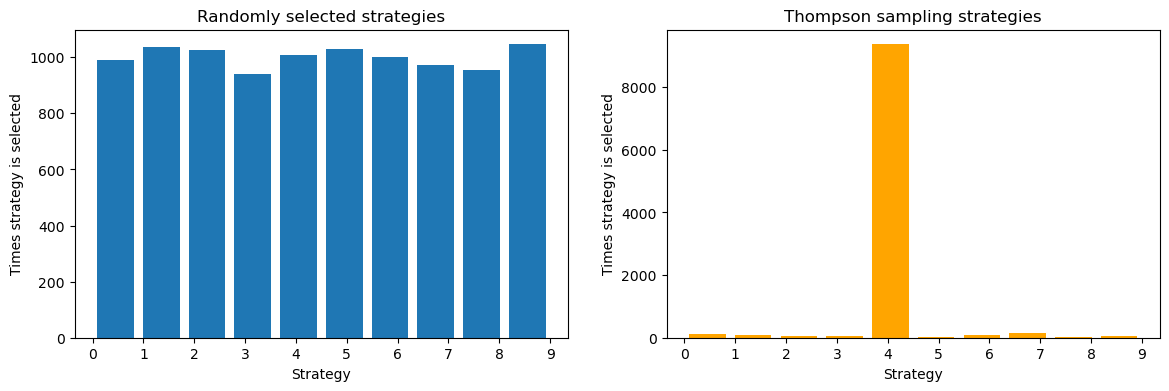

In [80]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(ads_selected_random, align='mid', rwidth=0.8)
ax[0].set_xticks(range(0, 10, 1))
ax[0].set_title('Randomly selected strategies')
ax[0].set_xlabel('Strategy')
ax[0].set_ylabel('Times strategy is selected')

ax[1].hist(ads_selected_thompson, align='mid', rwidth=0.8, color = 'Orange')
ax[1].set_xticks(range(0, 10, 1))
ax[1].set_title('Thompson sampling strategies')
ax[1].set_xlabel('Strategy')
ax[1].set_ylabel('Times strategy is selected')
plt.savefig('Strategy_selection_count_comparison.png')
plt.show()

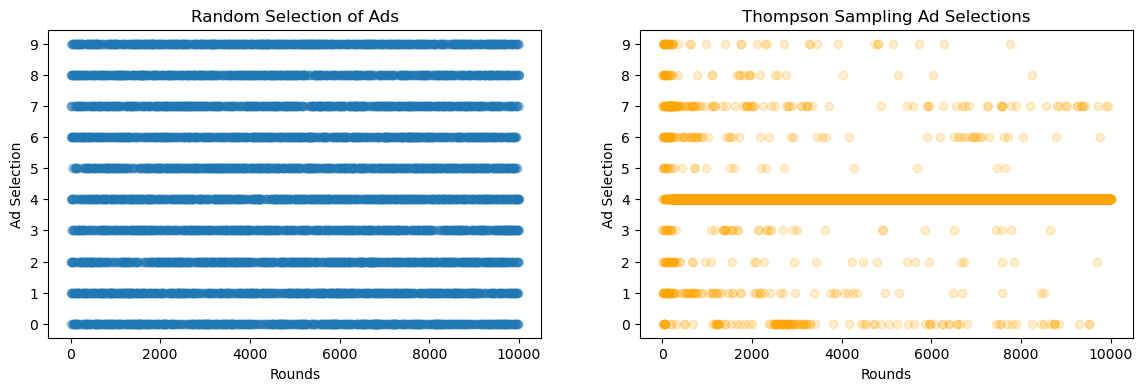

In [88]:
%matplotlib inline
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

axs[0].scatter(range(0 , 10000) , ads_selected_random , marker='o', alpha = 0.2)
axs[0].set_yticks(range(0,10))
axs[0].set_title('Random Selection of Ads')
axs[0].set_xlabel('Rounds')
axs[0].set_ylabel('Ad Selection')

axs[1].scatter(range(0 , 10000) , ads_selected_thompson , marker='o', color='Orange', alpha = 0.2)
axs[1].set_yticks(range(0,10))
axs[1].set_title('Thompson Sampling Ad Selections')
axs[1].set_xlabel('Rounds')
axs[1].set_ylabel('Ad Selection')
plt.savefig('Strategy_selection_through_rounds_comparison.png')
plt.show()

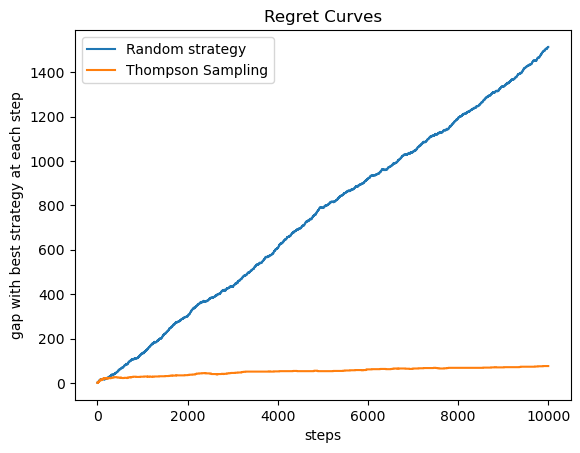

In [71]:
%matplotlib inline
plt.plot(range(0,N), regret_curve_random, label='Random strategy')
plt.plot(range(0,N), regret_curve_thompson, label='Thompson Sampling')
plt.title('Regret Curves')
plt.legend(loc='upper left')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.savefig('random.png')
plt.show()

### Thompson Sampling has very low regret with the best strategy at each nth round

In [75]:
gap_result = pd.DataFrame({'Random': regret_curve_random, 'Thompson' : regret_curve_thompson})

In [77]:
gap_result.head()

,Random,Thompson
0,1,1
1,2,1
2,2,1
3,2,0
4,2,0


In [78]:
gap_result.tail()

,Random,Thompson
9995,1514,76
9996,1514,76
9997,1514,76
9998,1514,76
9999,1514,76


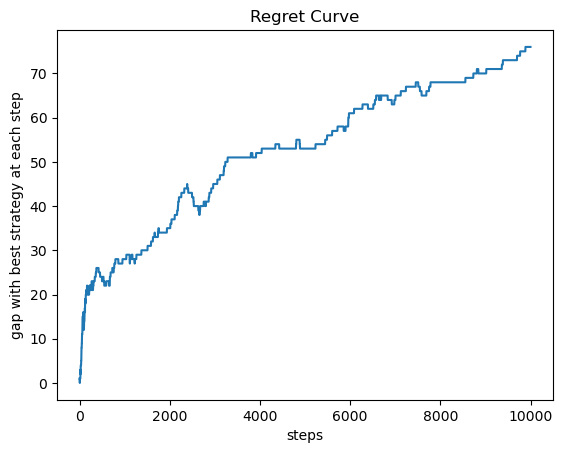

In [82]:
%matplotlib inline
plt.plot(range(0,N), regret_curve_thompson, label='Thompson Sampling')
plt.title('Regret Curve')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.savefig('regret_curve_thompson.png')
plt.show()